In [1]:
import pandas as pd
import numpy as np
import matplotlib 

In [2]:
weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [3]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-28,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.50,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-29,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.95,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-30,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.95,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.657765
ACSH       0.657765
AWND       0.515753
DAPR       0.999532
FMTM       0.871750
FRGT       0.999883
MDPR       0.999532
PGTM       0.501581
PRCP       0.016456
SNOW       0.333568
SNWD       0.326306
TAVG       0.880710
TMAX       0.000527
TMIN       0.000586
TSUN       0.932595
WDF1       0.657765
WDF2       0.515695
WDF5       0.520848
WDFG       0.750117
WSF1       0.657765
WSF2       0.515636
WSF5       0.520848
WSFG       0.750117
WT01       0.780394
WT02       0.980265
WT03       0.992973
WT04       0.999766
WT05       0.998360
WT07       0.999883
WT08       0.812017
WT09       0.999883
WT16       0.885512
WT18       0.999824
dtype: float64

In [5]:
core_weather = weather[["PRCP","SNOW","SNWD","TMAX","TMIN"]].copy()

In [6]:
core_weather.columns = ["prcp","snow","snowdepth","temp_max","temp_min"]

In [7]:
core_weather

,prcp,snow,snowdepth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-08-28,0.0,NaN,NaN,73.0,58.0
2022-08-29,0.0,NaN,NaN,71.0,57.0
2022-08-30,0.0,NaN,NaN,72.0,56.0


In [8]:
core_weather["snow"].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [9]:
del core_weather["snow"]

In [10]:
core_weather["snowdepth"].value_counts()

0.0    11504
Name: snowdepth, dtype: int64

In [11]:
del core_weather["snowdepth"]

In [12]:
core_weather[pd.isnull(core_weather["prcp"])]

,prcp,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [13]:
core_weather.loc["1983-11-13":"2013-12-15"]

,prcp,temp_max,temp_min
DATE,,,
1983-11-13,NaN,60.0,50.0
1983-11-14,NaN,61.0,45.0
1983-11-15,0.00,60.0,45.0
1983-11-16,0.30,61.0,56.0
1983-11-17,0.98,62.0,55.0
...,...,...,...
2013-12-11,0.00,53.0,31.0
2013-12-12,0.00,54.0,31.0
2013-12-13,0.00,53.0,34.0


In [43]:
core_weather = core_weather.fillna(0)

In [44]:
core_weather.loc["1983-11-13":"2000-12-15"]

,prcp,temp_max,temp_min,target
DATE,,,,
1983-11-13,0.00,60.0,50.0,61.0
1983-11-14,0.00,61.0,45.0,60.0
1983-11-15,0.00,60.0,45.0,61.0
1983-11-16,0.30,61.0,56.0,62.0
1983-11-17,0.98,62.0,55.0,62.0
...,...,...,...,...
2000-12-11,0.20,54.0,43.0,55.0
2000-12-12,0.02,55.0,43.0,57.0
2000-12-13,0.31,57.0,47.0,60.0


In [45]:
core_weather = core_weather.fillna(method = "ffill")

In [46]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

prcp        0.0
temp_max    0.0
temp_min    0.0
target      0.0
dtype: float64

In [47]:
core_weather.dtypes

prcp        float64
temp_max    float64
temp_min    float64
target      float64
dtype: object

In [48]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26',
               '2022-08-27', '2022-08-28', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01'],
              dtype='datetime64[ns]', name='DATE', length=17076, freq=None)

In [49]:
core_weather.index = pd.to_datetime(core_weather.index)

In [50]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-08-23', '2022-08-24', '2022-08-25', '2022-08-26',
               '2022-08-27', '2022-08-28', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01'],
              dtype='datetime64[ns]', name='DATE', length=17076, freq=None)

In [51]:
core_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=17076)

In [52]:
core_weather.apply(lambda x: (x==9999).sum())

prcp        0
temp_max    0
temp_min    0
target      0
dtype: int64

In [53]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    244
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

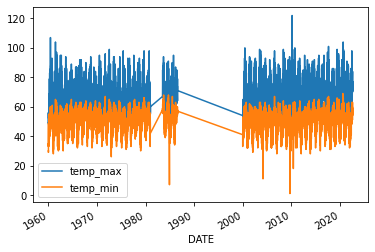

In [54]:
core_weather[["temp_max","temp_min"]].plot()

<AxesSubplot:xlabel='DATE'>

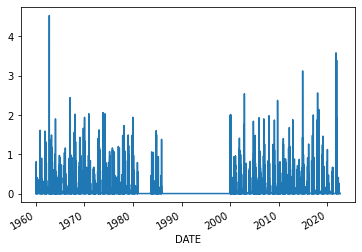

In [55]:
core_weather["prcp"].plot()

In [56]:
core_weather.groupby(core_weather.index.year).sum()["prcp"]

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     2.13
Name: prcp, dtype: float64

In [57]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [91]:
core_weather

,prcp,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-08-27,0.0,75.0,57.0,73.0
2022-08-28,0.0,73.0,58.0,71.0
2022-08-29,0.0,71.0,57.0,72.0


In [93]:
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,prcp,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-08-26,0.0,72.0,57.0,75.0
2022-08-27,0.0,75.0,57.0,73.0
2022-08-28,0.0,73.0,58.0,71.0


In [82]:
from sklearn.linear_model import Ridge

In [83]:
reg = Ridge(alpha=.1)

In [84]:
predictors = ["prcp","temp_max","temp_min"]

In [85]:
train = core_weather.loc[:"2020-12-31"]

In [86]:
test = core_weather.loc["2021-01-01":]

In [87]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [88]:
predictions = reg.predict(test[predictors])

In [89]:
from sklearn.metrics import mean_absolute_error

In [90]:
mean_absolute_error(test["target"],predictions)

3.389858661331528

In [94]:
 combined = pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis = 1)

In [97]:
combined.columns = ["actual","predictions"]

In [98]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-08-27,73.0,73.677837
2022-08-28,71.0,72.415251
2022-08-29,72.0,70.793284


<AxesSubplot:xlabel='DATE'>

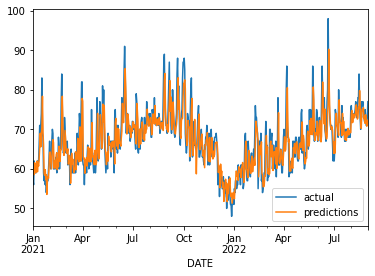

In [99]:
combined.plot()

In [100]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [102]:
def create_predictions(predictors,core_weather,reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"],predictions)
    combined = pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis = 1)
    combined.columns = ["actual","predictions"]
    return error, combined
    

In [103]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [105]:
core_weather["month_day_max"] = core_weather["month_max"]/core_weather["temp_max"]

In [111]:
core_weather["max_min"] = core_weather["temp_max"]/core_weather["temp_min"]
core_weather = core_weather.iloc[30:,:].copy()
predictors = ["prcp","temp_max","temp_min","month_max","month_day_max","max_min"]
error, combined = create_predictions(predictors,core_weather,reg)

In [112]:
error

3.3270937948073382

<AxesSubplot:xlabel='DATE'>

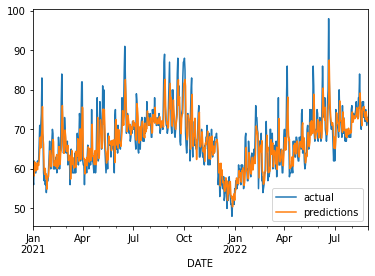

In [113]:
combined.plot()

In [114]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [115]:
core_weather

,prcp,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-03-01,0.00,55.0,43.0,58.0,59.866667,1.088485,1.279070,55.000000
1960-03-02,0.00,58.0,40.0,62.0,59.733333,1.029885,1.450000,56.500000
1960-03-03,0.00,62.0,47.0,62.0,59.833333,0.965054,1.319149,58.333333
1960-03-04,0.00,62.0,52.0,58.0,59.933333,0.966667,1.192308,59.250000
1960-03-05,0.13,58.0,54.0,59.0,59.866667,1.032184,1.074074,59.000000
...,...,...,...,...,...,...,...,...
2022-08-26,0.00,72.0,57.0,75.0,74.066667,1.028704,1.263158,71.996554
2022-08-27,0.00,75.0,57.0,73.0,74.300000,0.990667,1.315789,71.998623
2022-08-28,0.00,73.0,58.0,71.0,74.433333,1.019635,1.258621,71.999312


In [116]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean()) 

In [120]:
core_weather
predictors = ["prcp","temp_max","temp_min","month_max","month_day_max","max_min","day_of_year_avg","monthly_avg"]

In [121]:
error, combined = create_predictions(predictors,core_weather,reg)

In [122]:
error

3.2873571701545536

In [123]:
reg.coef_

array([ -0.90657491,   0.40057565,   0.03082803,   0.33761669,
       -16.03804065,   0.04917173,   0.08102419,   0.14250199])

In [124]:
combined["diff"] = (combined["actual"]-combined["predictions"]).abs()

In [125]:
combined["diff"]

DATE
2021-01-01    2.567930
2021-01-02    1.601169
2021-01-03    5.035431
2021-01-04    1.730667
2021-01-05    0.102174
                ...   
2022-08-26    2.430373
2022-08-27    1.547525
2022-08-28    2.435938
2022-08-29    0.052037
2022-08-30    0.358123
Name: diff, Length: 607, dtype: float64

In [127]:
combined.sort_values("diff",ascending = False).head()

,actual,predictions,diff
DATE,,,
2022-06-20,98.0,76.771169,21.228831
2022-05-23,86.0,69.836435,16.163565
2021-01-17,83.0,68.589700,14.410300
2021-05-07,81.0,67.776807,13.223193
2021-04-01,62.0,75.178193,13.178193


In [128]:
error, combined = create_predictions(predictors,core_weather,reg)

<AxesSubplot:xlabel='DATE'>

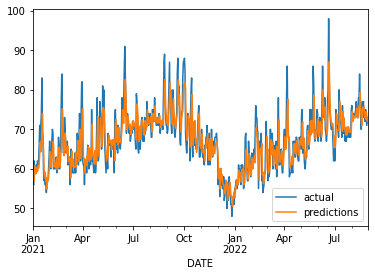

In [129]:
combined.plot()